# Introduction to ODEs
The goal of this lesson is to introduce/reintroduce some ideas about differential equations and initial value problems and some python routines that can be used to analyze models with ODEs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline

### Saltwater 
Consider a 50 gallon tank of pure water. Saltwater with concentration 2 lbs/gal is pumped in at a rate of 3 gal/min, is continuously mixed, and flows out at 3 gal/min.
- Set up an IVP describing this situation.
- Describe the DE using vocabulary you learned in Math 250.
- Solve this system. Is there a particular method that is aimed at this type of problem?

Think about the system above. We don't always need to solve every ODE or IVP analytically. In fact, we often can't do this! Thus, having some numerical methods at our disposal is important. The first numerical method for IVPs is Euler's method. If we understand this method well, we can see what other methods are trying to do without having to analyze them using a level of rigor that takes more math.

Euler's method to solve the IVP $\frac{dy}{dx} = f(x,y), y(x_0)=x_0$ is given by
\begin{align*}
x_{n+1} &= x_n + h\\
y_{n+1} &= y_n + hf(x_n,y_n)\\
x_0 &= x_0, y_0 = y(x_0).
\end{align*}

- Implement this method below for the IVP above.
- Plot the numerical approximation and the exact solution on one figure.

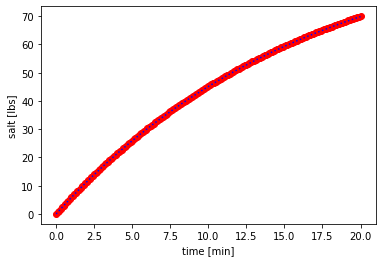

In [5]:
ts = np.linspace(0,20,201)
h = 0.1

xs = np.copy(ts)
xs[0] = 0.

for i in range(1,len(xs)):
    ts[i] = ts[i-1] + h
    xs[i] = xs[i-1] + h*(6.-(3./50.)*xs[i-1])

    
xexact = 100.*(1.-np.exp(-3.*ts/50.))    
plt.plot(ts,xs,'ro',ts,xexact,'b:');
plt.xlabel('time [min]');
plt.ylabel('salt [lbs]');

### Lake Eutrophication
If you visit a lot of lakes of different sizes in different parts of the world, you will see that there are two common physical states. Some lakes are relatively clean and fresh-smelling— these are called oligotrophic. In contrast, eutrophic lakes are overgrown with algae and have a rank smell. Eutrophic lakes have a phosphorus content that is many times higher than that of oligotrophic lakes. Biologists have long known that there does not appear to be a gradation of intermediate states; indeed, rapid eutrophication of formerly oligotrophic lakes is an environmental problem that can be caused by runoff of fertilizer from farms. Why there are no intermediate states, how eutrophication occurs, and the possibility of restoring a eutrophic lake are all questions that can be explored with a simple mathematical model due to a 1999 paper by Carpenter et al.
$$\frac{dp}{dt} = b - p + r\frac{p^q}{1 + p^q}$$
This nondimensionalized model incorporates three mechanisms for change in phosphorus content in a lake on the LHS of the DE. The first term, $b$, represents the influx of phosphorus from the environment; this can include artificial sources such as farm runoff as well as natural sources such as decomposition of plants. The standard use of phosphates in laundry and dishwashing detergents was linked to lake eutrophication in the late 1960s and spawned one of the early conflicts between the environmental movement and industry. Phosphates are still used in some detergents, but smaller amounts and better treatment of wastewater have significantly reduced their contribution to eutrophication. The second term represents the combined processes of sedimentation, outflow, and absorption by plants, all of which remove phosphorus from the water. The last term represents the recycling of phosphorus from sediments. This term plays a significant role in the physical system, because the large values typical of $q$ (from 2 for a cold deep lake to as much as 20 for a warm shallow lake) mean that the recycling rate is roughly $r$ when $p>1$ and very small when $p<1$. Thus, eutrophic lakes, which are high in phosphorus, have large recycling rates that keep the phosphorus concentration high; oligotrophic lakes, in contrast, have very little recycling of sedimentary phosphorus.

- Let $b=0.25$, $q=8, r=5$.  
 - Graph $\frac{dp}{dt}$ vs $p$.
 - Using some numerical tool, calculate any equilibrium solutions. You can use the fsolve command from the scipy library.
 - What if $b=1$? What changes above? What does $b$ do to the graph?
- What are equilibrium solutions associated with in the graphs? Which equilibrium solutions do you think are stable and unstable?
- Interpret each of the two pictures in the context of the problem described above. Write a short paragraph in your notes includes rough sketches of your figures that describes how the value of $b$ affects the dynamics of this system.
- Use the Euler's method to generate some numerical solution curves. 
- If you are interested in this problem UW Stout has a LAKES REU related to this problem. These equations come from this paper studying Lake Mendota in Madison.

[0.25007648]
[0.7624365]
[5.24999134]


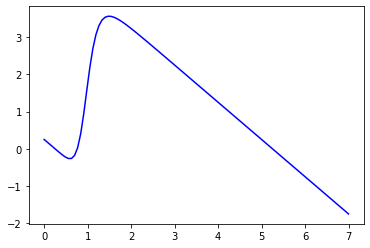

In [7]:
b = 0.25
r = 5.
q = 8.
def dpdt(p):
    return(b - p + r*p**q/(1.+p**q))
ps = np.linspace(0,7.,101)
dps = dpdt(ps)
plt.plot(ps,dps,'b');

sol = fsolve(dpdt,0)
print(sol)
sol = fsolve(dpdt,1)
print(sol)
sol = fsolve(dpdt,5)
print(sol)


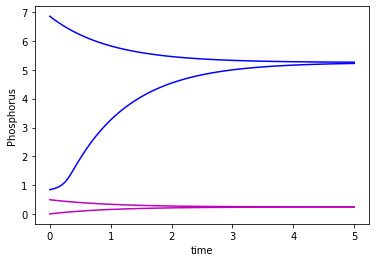

In [12]:
ts = np.linspace(0,5,101)
h = 0.05
ps = np.copy(ts)

def dpdt(t,p):
    return(b - p + r*p**q/(1.+p**q))

ps[0] = 0.01  #initial value
t = 0 #inital time
for i in range(0,100):  #Euler method loop
    ts[i+1] = ts[i] + h
    ps[i+1] = ps[i] + h*dpdt(ts[i],ps[i])
    
plt.plot(ts,ps,'m');
plt.xlabel('time');
plt.ylabel('Phosphorus');

ps[0] = 0.5  #initial value
t = 0 #inital time
for i in range(0,100):  #Euler method loop
    ts[i+1] = ts[i] + h
    ps[i+1] = ps[i] + h*dpdt(ts[i],ps[i])
plt.plot(ts,ps,'m');

ps[0] = 0.85  #initial value
t = 0 #inital time
for i in range(0,100):  #Euler method loop
    ts[i+1] = ts[i] + h
    ps[i+1] = ps[i] + h*dpdt(ts[i],ps[i])
plt.plot(ts,ps,'b');

ps[0] = 6.85  #initial value
t = 0 #inital time
for i in range(0,100):  #Euler method loop
    ts[i+1] = ts[i] + h
    ps[i+1] = ps[i] + h*dpdt(ts[i],ps[i])
plt.plot(ts,ps,'b');


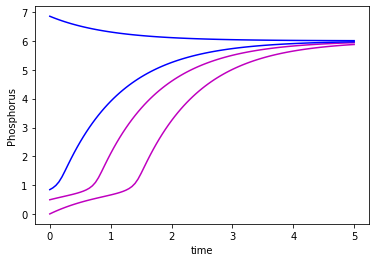

In [13]:
b= 1.
ts = np.linspace(0,5,101)
h = 0.05
ps = np.copy(ts)

def dpdt(t,p):
    return(b - p + r*p**q/(1.+p**q))

ps[0] = 0.01  #initial value
t = 0 #inital time
for i in range(0,100):  #Euler method loop
    ts[i+1] = ts[i] + h
    ps[i+1] = ps[i] + h*dpdt(ts[i],ps[i])
    
plt.plot(ts,ps,'m');
plt.xlabel('time');
plt.ylabel('Phosphorus');

ps[0] = 0.5  #initial value
t = 0 #inital time
for i in range(0,100):  #Euler method loop
    ts[i+1] = ts[i] + h
    ps[i+1] = ps[i] + h*dpdt(ts[i],ps[i])
plt.plot(ts,ps,'m');

ps[0] = 0.85  #initial value
t = 0 #inital time
for i in range(0,100):  #Euler method loop
    ts[i+1] = ts[i] + h
    ps[i+1] = ps[i] + h*dpdt(ts[i],ps[i])
plt.plot(ts,ps,'b');

ps[0] = 6.85  #initial value
t = 0 #inital time
for i in range(0,100):  #Euler method loop
    ts[i+1] = ts[i] + h
    ps[i+1] = ps[i] + h*dpdt(ts[i],ps[i])
plt.plot(ts,ps,'b');


### Exercise
Consider the IVP $\frac{dy}{dx} = e^{x-y}, y(0)=0$.
- What is the exact solution?
- Use Euler's method to calculate the approximate solution for $0 \leq x \leq 1$ with $h=0.1$.
- Calculate the error between the method and the exact solution.
- Can you explain the behavior you see?

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


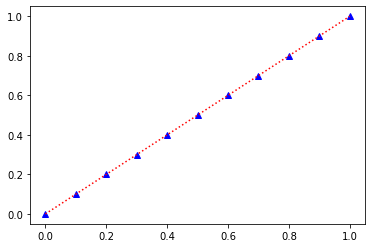

In [16]:
xs =np.linspace(0,1,11)
h = 0.1
ys = np.copy(xs)

def f(x,y):
    return(np.exp(x-y))

ys[0] = 0.
xs[0] = 0.

for i in range(0,10):
    xs[i+1] = xs[i] + h
    ys[i+1] = ys[i] + h*f(xs[i],ys[i])
    
plt.plot(xs,ys,'b^',xs,xs,'r:');

print(xs,ys)

### Making Connections
What does Euler's method have to do with the numerical integration routines we've learned earlier in the course? How can we use these ideas/connections to improve upon Euler's method?

- Pick a differential equation with an analytical solution.
- Find the exact solution.
- Write an improved Euler method that uses the ideas we discuss above.
- Plot the exact solution, the solution from Euler's method, and the new solution on the same figure.

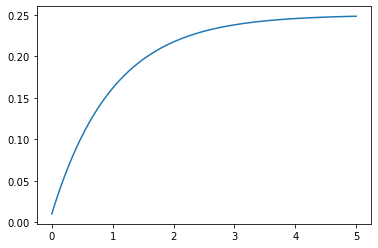

In [17]:
#b = 0.25 case of lake ODE
b = 0.25
ts = np.linspace(0,5,101)
h = 0.05
ps = np.copy(ts)

def dpdt(t,p):
    return(b - p + r*p**q/(1.+p**q))

ps[0] = 0.01  #initial value
t = 0 #inital time
for i in range(0,100):  #Improved Euler method loop
    ts[i+1] = ts[i] + h
    ps[i+1] = ps[i] + (h/2.)*(dpdt(ts[i],ps[i]) + dpdt(ts[i]+h,ps[i]+h*dpdt(ts[i],ps[i])))

plt.plot(ts,ps)

### Runge-Kutta

### Built in routines and what they are trying to do
[Solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) is a built in routine for solving initial value problems. Note the location of this routine inside the integrate package of scipy. Look at the documentation. What kinds of DEs is this routine "limited" to?

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.09788051, 0.40188746, 0.70589441, 1.22044653,
       2.16013278, 3.20907242, 4.48958699, 5.        ])
 t_events: None
        y: array([[0.8       , 0.82170008, 1.16104253, 2.18175535, 3.41515046,
        4.53242779, 4.9981761 , 5.17946109, 5.20765496]])
 y_events: None


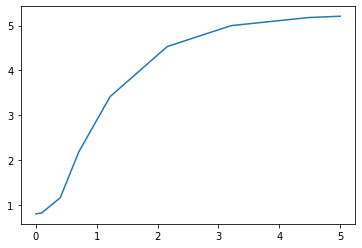

In [22]:
from scipy.integrate import solve_ivp

b = 0.25
r = 5.
q= 8.

def dpdt(t,p):
    return(b - p + r*p**q/(1.+p**q))

sol = solve_ivp(dpdt,[0,5.],[0.8])

plt.plot(sol.t,sol.y[0])

print(sol)



### Exercise

Consider a mass hanging from a ceiling by a spring with stiffness $k$ and damping $b$. Gravity acts in the positive $y$ direction. Initially the mass is at rest and the spring is unstretched.

- Draw a picture of the situation.
- Write a differential equation for the motion of the mass. What is the initial condition?
- What labels can you apply to the DE?
- Solve analytically if possible.
- Rewrite this as a system of first order DE.
- Use solve_ivp to numerically approximate the solution. 
- Plot this approximation and the exact solution on one figure.